# Final Project

### Shortcuts
- [Data](#section 1)<br>
- [Visualising the Data](#section 2)<br>
- [Color Space Visualisations](#section last)<br>

#### Dependencies

In [191]:
import numpy as np
from datascience import *
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
#%matplotlib inline
#plt.style.use('fivethirtyeight')

from bokeh.plotting import figure, output_file, show
import seaborn as sns

from colormath.color_objects import *
from colormath.color_conversions import convert_color

In [248]:
#for plotting
from wcsHelper import *
munsell_to_chip, chip_to_munsell, chip_to_clab, chip_to_rgb = readChipData('chipnum-info.txt')

# Data<a id='section 1'>

In [247]:
from wcs_helper_functions import *
from wcs_table_helper import *

coord_to_index, index_to_coord = readChipData('./WCS_data_core/chip.txt')
coordToIndexTable, indexToCoordTable = loadChipTables(coord_to_index, index_to_coord)

index_to_clab = readClabData('./WCS_data_core/cnum-vhcm-lab-new.txt')
clabTable = loadClabTable(index_to_clab)

namingData = readNamingData('./WCS_data_core/term.txt')
namingTable = loadNamingTable(namingData)

fociData = readFociData('./WCS_data_core/foci-exp.txt')
fociTable = loadFociTable(fociData)

speakerData = readSpeakerData('./WCS_data_core/spkr-lsas.txt')
speakerTable = loadSpeakerTable(speakerData)

In [7]:
def str_to_float(arr):
    new_arr = np.array([])
    for i in arr:
        new_arr = np.append(new_arr, float(i))
    return new_arr

In [26]:
ctit = coordToIndexTable.join('Index', clabTable)
ctit

Index,Coordinate,l,a,b
1,E29,61.70,-4.52,-39.18
2,C23,81.35,-19.64,-4.30
3,F4,51.57,55.20,68.32
4,I36,20.54,24.14,-14.33
5,C20,81.35,-33.04,4.96
6,C6,81.35,14.87,30.96
7,E15,61.70,-46.97,64.65
8,H40,30.77,47.63,5.24
9,G6,41.22,22.15,41.13
10,I30,20.54,7.63,-35.92


In [27]:
clabsort = Table().with_column('Index', np.arange(1, 331))
for i in np.arange(1, 4):
    label = ['l', 'l', 'a', 'b']
    flt = str_to_float(clabTable.column(i))
    clabsort = clabsort.with_column(label[i], flt)
clabsort

Index,l,a,b
1,61.7,-4.52,-39.18
2,81.35,-19.64,-4.3
3,51.57,55.2,68.32
4,20.54,24.14,-14.33
5,81.35,-33.04,4.96
6,81.35,14.87,30.96
7,61.7,-46.97,64.65
8,30.77,47.63,5.24
9,41.22,22.15,41.13
10,20.54,7.63,-35.92


In [28]:
indexcoordtable = indexToCoordTable.join('Coordinate', ctit, 'Index').relabel(3, 'index').drop(4, 5, 6)
indexcoordclabtable = indexcoordtable.join('Coordinate', clabsort, 'Index')
data = indexcoordclabtable

In [29]:
fociTable.group('Foci').sort(1, descending = True)

Foci,count
A:0,2422
J:0,2359
C:9,752
G:1,665
G:2,541
C:8,492
F:17,351
C:10,351
G:3,342
C:11,286


In [30]:
data

Coordinate,Lightness,Hue,index,l,a,b
1,E,29,E29,61.7,-4.52,-39.18
2,C,23,C23,81.35,-19.64,-4.3
3,F,4,F4,51.57,55.2,68.32
4,I,36,I36,20.54,24.14,-14.33
5,C,20,C20,81.35,-33.04,4.96
6,C,6,C6,81.35,14.87,30.96
7,E,15,E15,61.7,-46.97,64.65
8,H,40,H40,30.77,47.63,5.24
9,G,6,G6,41.22,22.15,41.13
10,I,30,I30,20.54,7.63,-35.92


In [212]:
ft_w_ind = fociTable.with_column('Chip', [fociTable.column('Foci')[i].replace(':', "") for i in range(len(fociTable.column('Foci')))])
ft_w_ind

Language,Speaker,Term,Foci,Index
1,1,LF,A:0,A0
1,1,WK,D:9,D9
1,1,WK,D:10,D10
1,1,WK,D:11,D11
1,1,WK,D:12,D12
1,1,F,D:25,D25
1,1,LB,J:0,J0
1,1,G,F:17,F17
1,1,LE,F:1,F1
1,1,LE,F:2,F2


In [229]:
index = 1
speaker = ft_w_ind.column('Speaker')
response = np.array([])
for i in range(ft_w_ind.num_rows):
    if speaker[i] != speaker[i-1]:
        index = 1
        response = np.append(response, index)
    else:
        index += 1
        response = np.append(response, index)

In [238]:
ft_indresp = ft_w_ind.with_column('response num', response)

In [239]:
#sorted
ft_ir = ft_indresp.join('Index', data, 'index').sort('response num').sort('Speaker').sort('Language')

Index,Language,Speaker,Term,Foci,response num,Coordinate,Lightness,Hue,l,a,b
A0,1,1,LF,A:0,1,141,A,0,96,-0.06,0.06
D9,1,1,WK,D:9,2,326,D,9,71.6,6.22,81.95
D10,1,1,WK,D:10,3,146,D,10,71.6,-2.3,85.64
D11,1,1,WK,D:11,4,258,D,11,71.6,-9.51,87.14
D12,1,1,WK,D:12,5,193,D,12,71.6,-15.98,87.62
D25,1,1,F,D:25,6,49,D,25,71.6,-22.32,-14.67
J0,1,1,LB,J:0,7,89,J,0,15.6,-0.02,0.02
F17,1,1,G,F:17,8,202,F,17,51.57,-63.28,28.95
F1,1,1,LE,F:1,9,321,F,1,51.57,59.36,19.67
F2,1,1,LE,F:2,10,298,F,2,51.57,58.01,30.52


In [33]:
namingTable

Language,Speaker,Index,Term
1,1,1,LB
1,1,2,LB
1,1,3,LE
1,1,4,WK
1,1,5,LF
1,1,6,LE
1,1,7,F
1,1,8,LE
1,1,9,LE
1,1,10,LB


In [34]:
speakerTable

Language,Speaker,Age,Gender
1,1,90,M
1,2,26,M
1,3,38,M
1,4,35,M
1,5,80,M
1,6,48,M
1,7,26,M
1,8,39,M
1,9,47,F
1,10,49,M


In [36]:
from wcsHelper import *

langdict = readNamingData()
maxmin = {'max': ['lang', 0], 'min': [['lang', 5]]} #arbitrarily set 5 because no language has 0 unique color terms
for i in np.arange(1, 110+1):
    v = len(set(list(langdict[i][1].values())))
    if v > maxmin['max'][1]:
        maxmin['max'] = [i, v]
    elif v < maxmin['min'][0][1]:
        maxmin['min'] = [[i, v]]
    elif v == maxmin['min'][0][1]:
        maxmin['min'].append([i, v])
    elif v == maxmin['max'][0]:
        maxmin['max'].append([i, v])
maxmin

{'max': [91, 20], 'min': [[50, 3], [56, 3], [77, 3], [104, 3], [105, 3]]}

In [37]:
num_to_data = {}
for i in np.arange(1, 110+1):
    num_unique = len(set(list(langdict[i][1].values())))
    if num_unique not in num_to_data:
        num_to_data[num_unique] = [i]
    else:
        num_to_data[num_unique].append(i)
num_to_data

{3: [50, 56, 77, 104, 105],
 4: [23, 36, 43, 58, 61, 62, 66, 74],
 5: [12, 32, 63, 73, 97, 109],
 6: [1, 16, 21, 29, 30, 37, 47, 49, 53, 72, 81, 82, 90, 92, 94, 99, 100, 102],
 7: [11, 15, 28, 31, 33, 35, 40, 41, 42, 48, 51, 60, 65, 76, 79, 85, 96, 107],
 8: [2, 3, 6, 9, 22, 25, 45, 54, 69, 71, 75, 87, 93, 101, 108, 110],
 9: [4, 5, 10, 24, 44, 59, 70, 95, 98, 103],
 10: [18, 19, 34, 39, 55, 78, 80, 89],
 11: [26, 52, 57],
 12: [13, 38, 46, 64, 68, 83],
 13: [106],
 14: [67],
 15: [8, 14, 17, 84, 86, 88],
 16: [7, 27],
 18: [20],
 20: [91]}

In [38]:
uniqt = namingTable.group('Language', np.unique)

In [39]:
lang = 1
num_speakers = {}
for i in uniqt.column(1):
    num_speakers[lang] = len(i)
    lang += 1
num_speakers
#compare lang 84 and 86?

In [243]:
speakerTable

Language,Speaker,Age,Gender
1,1,90,M
1,2,26,M
1,3,38,M
1,4,35,M
1,5,80,M
1,6,48,M
1,7,26,M
1,8,39,M
1,9,47,F
1,10,49,M


In [244]:
int_age = str_to_float(speakerTable.column('Age'))
speakerTable.with_column('Age (int)', int_age)

Language,Speaker,Age,Gender,Age (int)
1,1,90,M,90
1,2,26,M,26
1,3,38,M,38
1,4,35,M,35
1,5,80,M,80
1,6,48,M,48
1,7,26,M,26
1,8,39,M,39
1,9,47,F,47
1,10,49,M,49


In [155]:
gender = speakerTable.column('Gender')
num_gender = np.array([])
for i in gender:
    if i == 'F':
        num_gender = np.append(num_gender, 1)
    elif i == 'M':
        num_gender = np.append(num_gender, 0)
    else:
        num_gender = np.append(num_gender, 2)
num_gender

array([0., 0., 0., ..., 1., 1., 0.])

In [171]:
df_st = speakerTable.drop('Age').drop('Gender').with_columns('Age', int_age, 'Gender', num_gender).to_df()

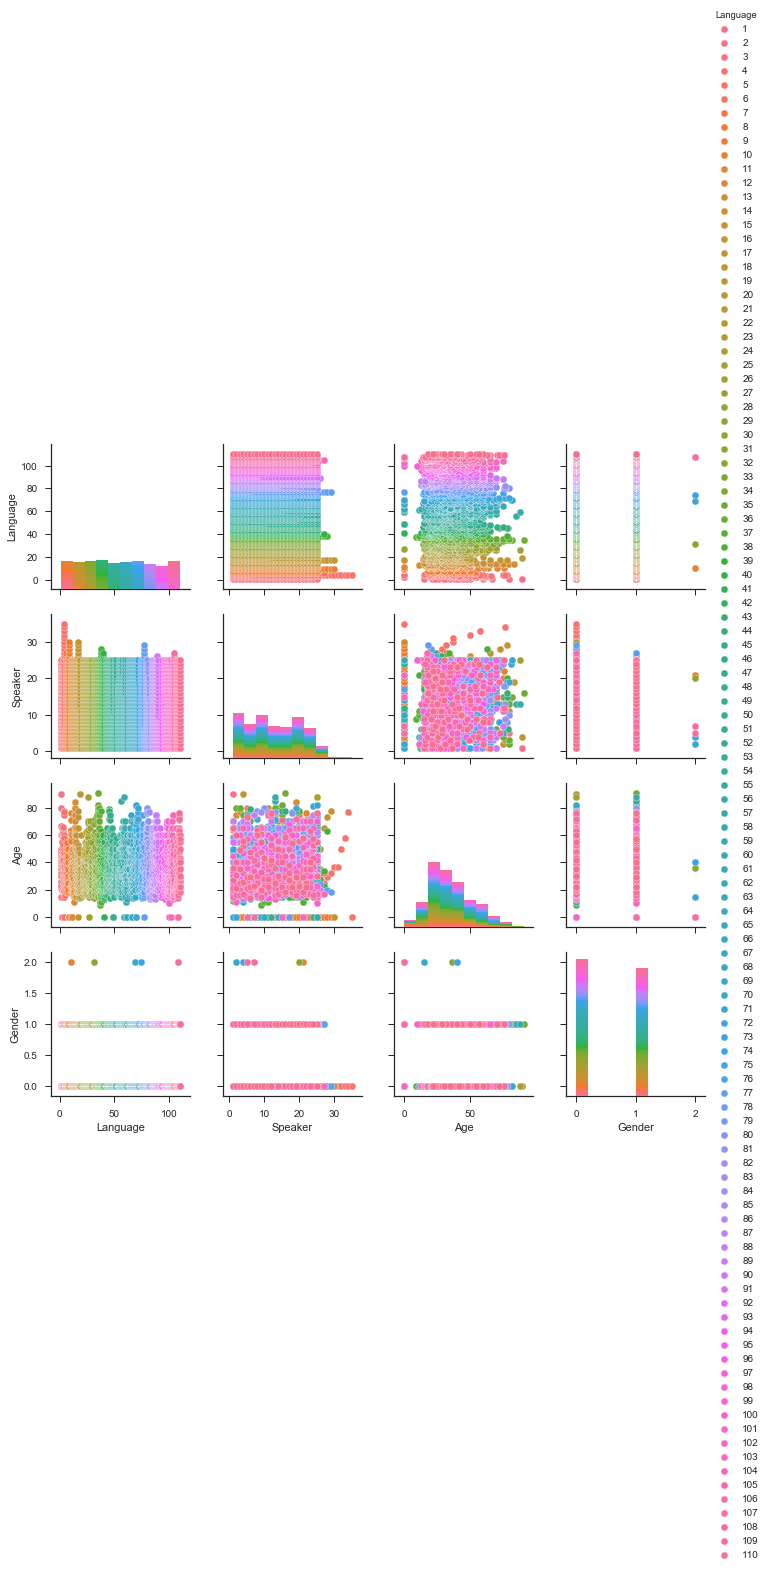

In [172]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_st, hue='Language')

# Visualising the data<a id='section 2'>

Plotting correlation matrix, pairplots, and histograms

# Color Space Visualisations<a id='section last'>

In [47]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [48]:
from colormath.color_objects import sRGBColor
from colormath.color_conversions import convert_color

In [49]:
lz = data.column('l')
a_x = data.column('a')
by = data.column('b')

In [241]:
hexcolor = make_array()
for i in np.arange(len(a_x)):
    lab = LabColor(lz[i], a_x[i], by[i])
    rgb = convert_color(lab, sRGBColor)
    hexcolor = np.append(hexcolor, rgb.get_rgb_hex())

colors = []
for i in np.arange(len(a_x)):
    lab = LabColor(lz[i], a_x[i], by[i])
    rgb = convert_color(lab, sRGBColor)
    r = str(rgb.get_value_tuple()[0] * 255)
    g = str(rgb.get_value_tuple()[1] * 255)
    b = str(rgb.get_value_tuple()[2] * 255)
    color = 'rgb(152, 0, 0)'
    colors += ['rgb('+ r + ', ' + g +', ' +  b + ')']

In [86]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='jasonsjiang', api_key='AIzrMaB4zhCuQ8U49Vx1')

In [44]:
all_color = go.Scatter3d(
    x=a_x,
    y=by,
    z=lz,
    mode='markers',
    marker=dict(
        size=8.5,
        color=colors,  
        opacity=0.8))

data = [all_color]
layout = go.Layout(
    title='Color Space (LAB to RGB)',
    scene = dict(
        xaxis = dict(title='a*'),
        yaxis = dict(title='b*'),
        zaxis = dict(title='L*'),),
    width=700,
    margin = dict(l=0, r=0, b=0, t=0)
    )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, file='LABColor')

In [194]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import *

In [14]:
colorzzz = []
for i in np.arange(len(a_x)):
    lab = LabColor(lz[i], a_x[i], by[i])
    rgb = convert_color(lab, sRGBColor)
    r = rgb.get_value_tuple()[0]
    g = rgb.get_value_tuple()[1]
    b = rgb.get_value_tuple()[2]
    colorzzz.append((r, g, b))
colorzzz

a = np.array([colorzzz[0]])
for i in np.arange(0, 330):
    a = np.vstack([a, colorzzz[i]])
numbered = a[1:]

In [15]:
#correct the index 
def find(lst):
    index = 0
    for i in lst:
        if i == '#100be00':
            return index
        index += 1
hexcolor[find(hexcolor)] = '#00be00'

<IPython.core.display.Javascript object>


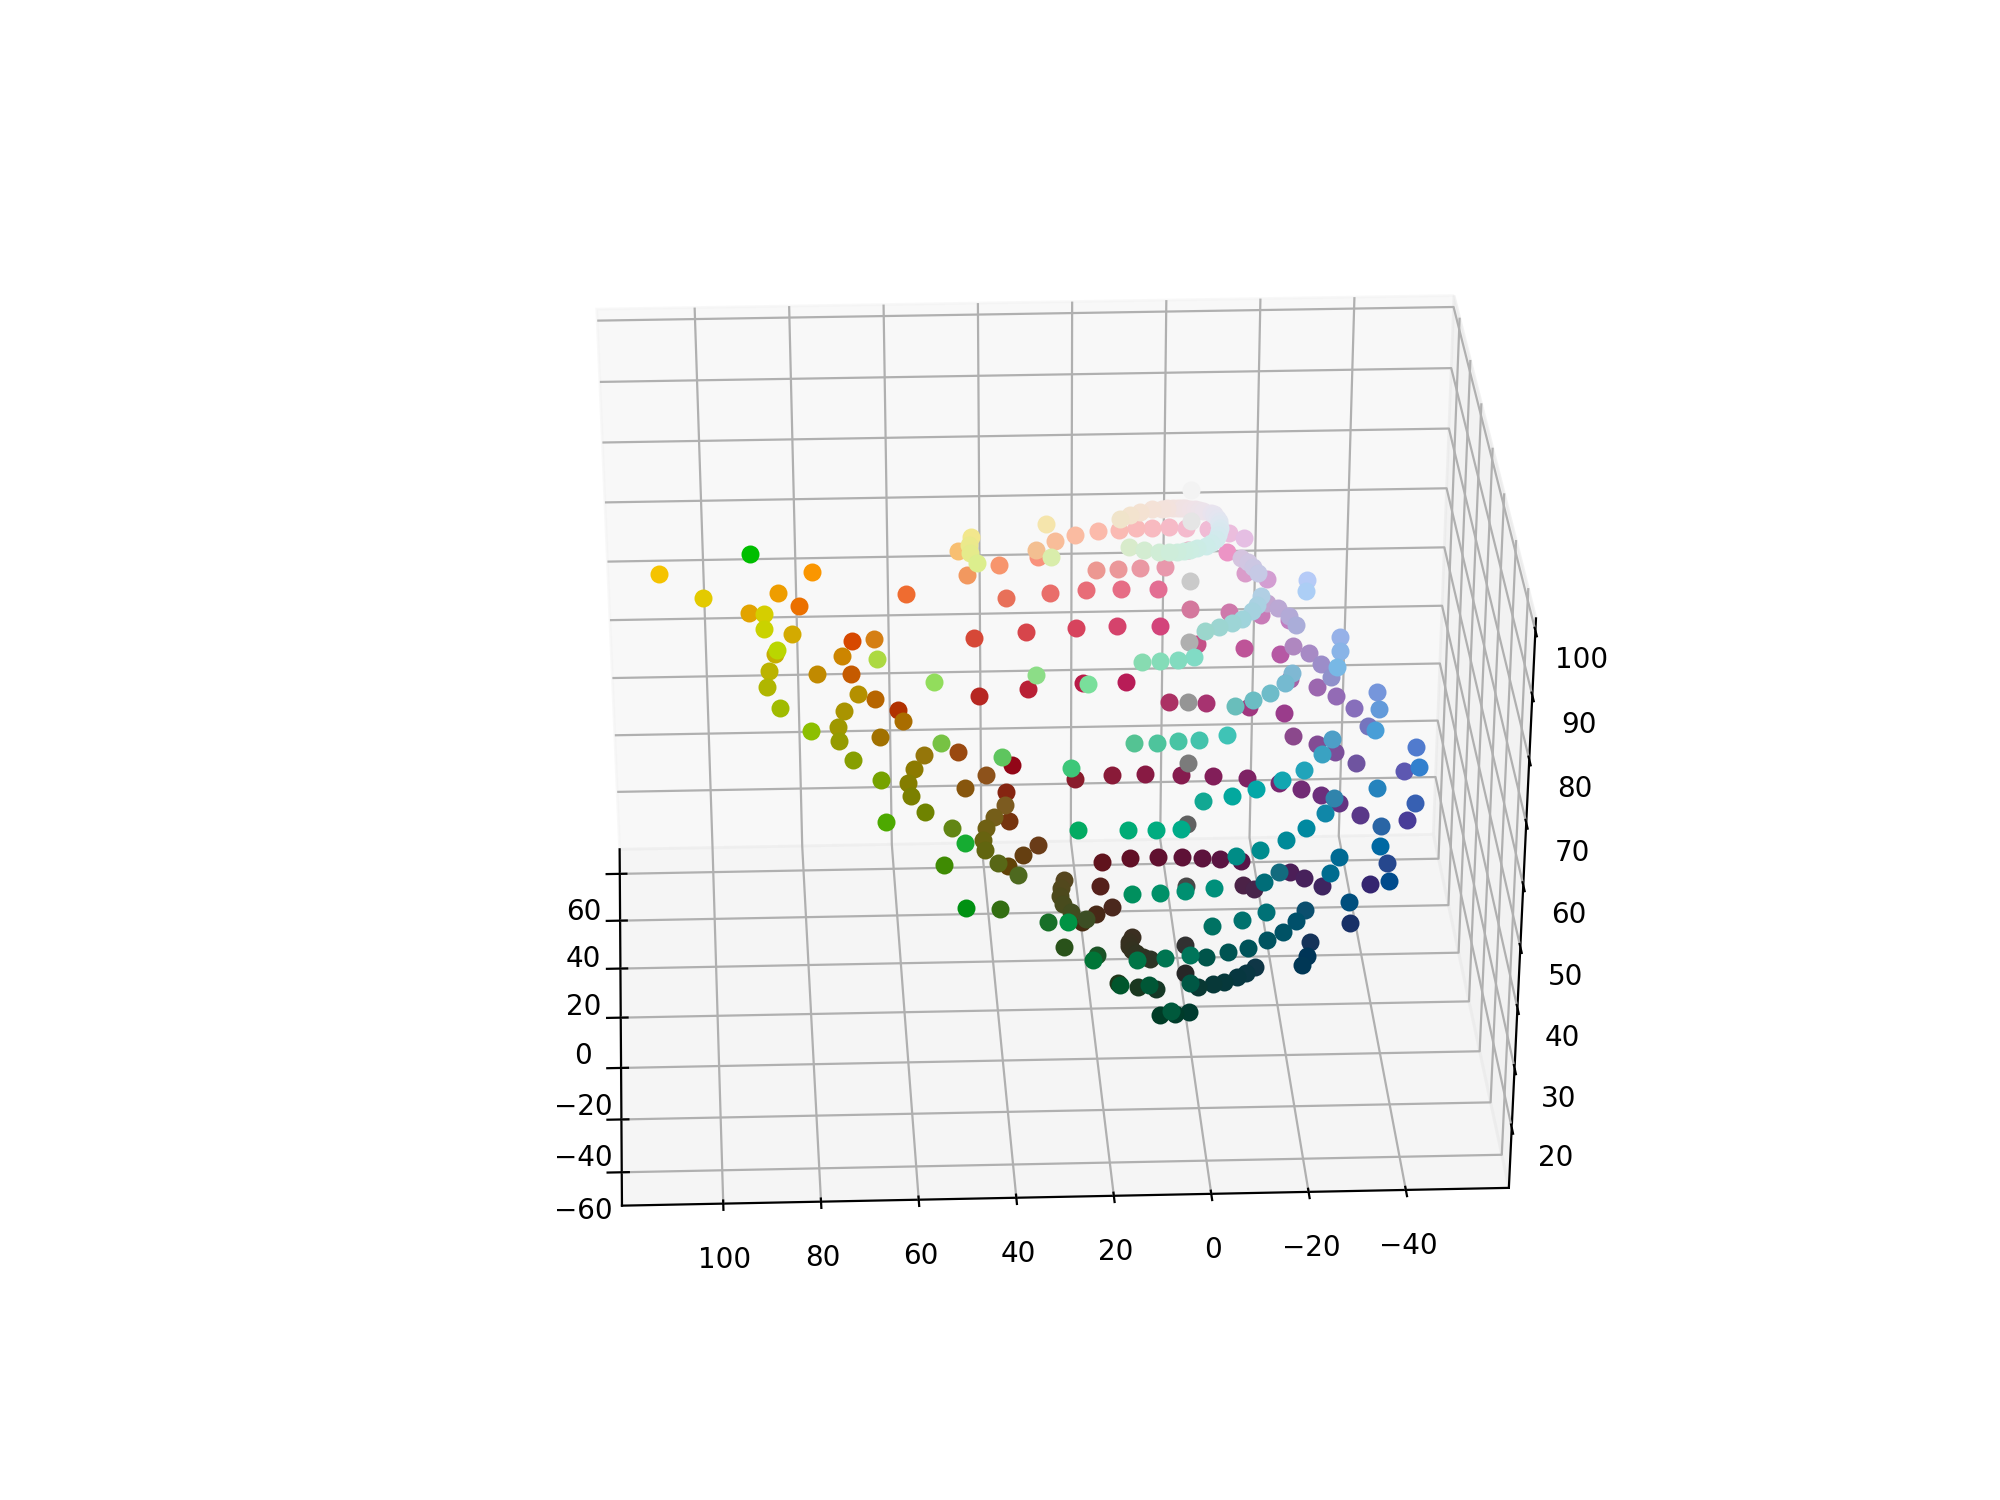

In [22]:
fig = plt.figure(figsize = (10, 7.5))
ax = fig.add_subplot(111, projection='3d')

for i in np.arange(330):
    ax.scatter(a_x[i], by[i], lz[i], color = matplotlib.colors.to_rgba(hexcolor[i]), s=30)
plt.show()

In [ ]:
hexcolor = make_array()
for i in np.arange(len(a_x)):
    lab = LabColor(lz[i], a_x[i], by[i])
    rgb = convert_color(lab, sRGBColor)
    hexcolor = np.append(hexcolor, rgb.get_rgb_hex())

In [65]:
def plot_colors(colors):
    hexcolor = np.array([])
    for i in np.arange(len(colors)):
        L = colors[i][0]
        A = colors[i][1]
        B = colors[i][2]
        lab = LabColor(L, A, B)
        rgb = convert_color(lab, sRGBColor)
        hexcolor = np.append(hexcolor, rgb.get_rgb_hex())
    fig = plt.figure(figsize = (10, 7.5))
    ax = fig.add_subplot(111, projection='3d')
    for i in np.arange(330):
        ax.scatter(A, B, L, color = matplotlib.colors.to_rgba(hexcolor[i]), s=30)
    plt.show()

In [249]:
#for plotting
from wcsHelper import *
munsell_to_chip, chip_to_munsell, chip_to_clab, chip_to_rgb = readChipData('chipnum-info.txt')

lg86sp1 = langdict[86][1]
grid861 = naming2grid(lg86sp1, chip_to_rgb)
colors = grid861

In [250]:
test_colors = []
for i in np.arange(len(tx)):
    lab = LabColor(tx[i], ty[i], tz[i])
    rgb = convert_color(lab, sRGBColor)
    r = str(rgb.get_value_tuple()[0] * 255)
    g = str(rgb.get_value_tuple()[1] * 255)
    b = str(rgb.get_value_tuple()[2] * 255)
    test_colors += ['rgb('+ r + ', ' + g +', ' +  b + ')']

<IPython.core.display.Javascript object>


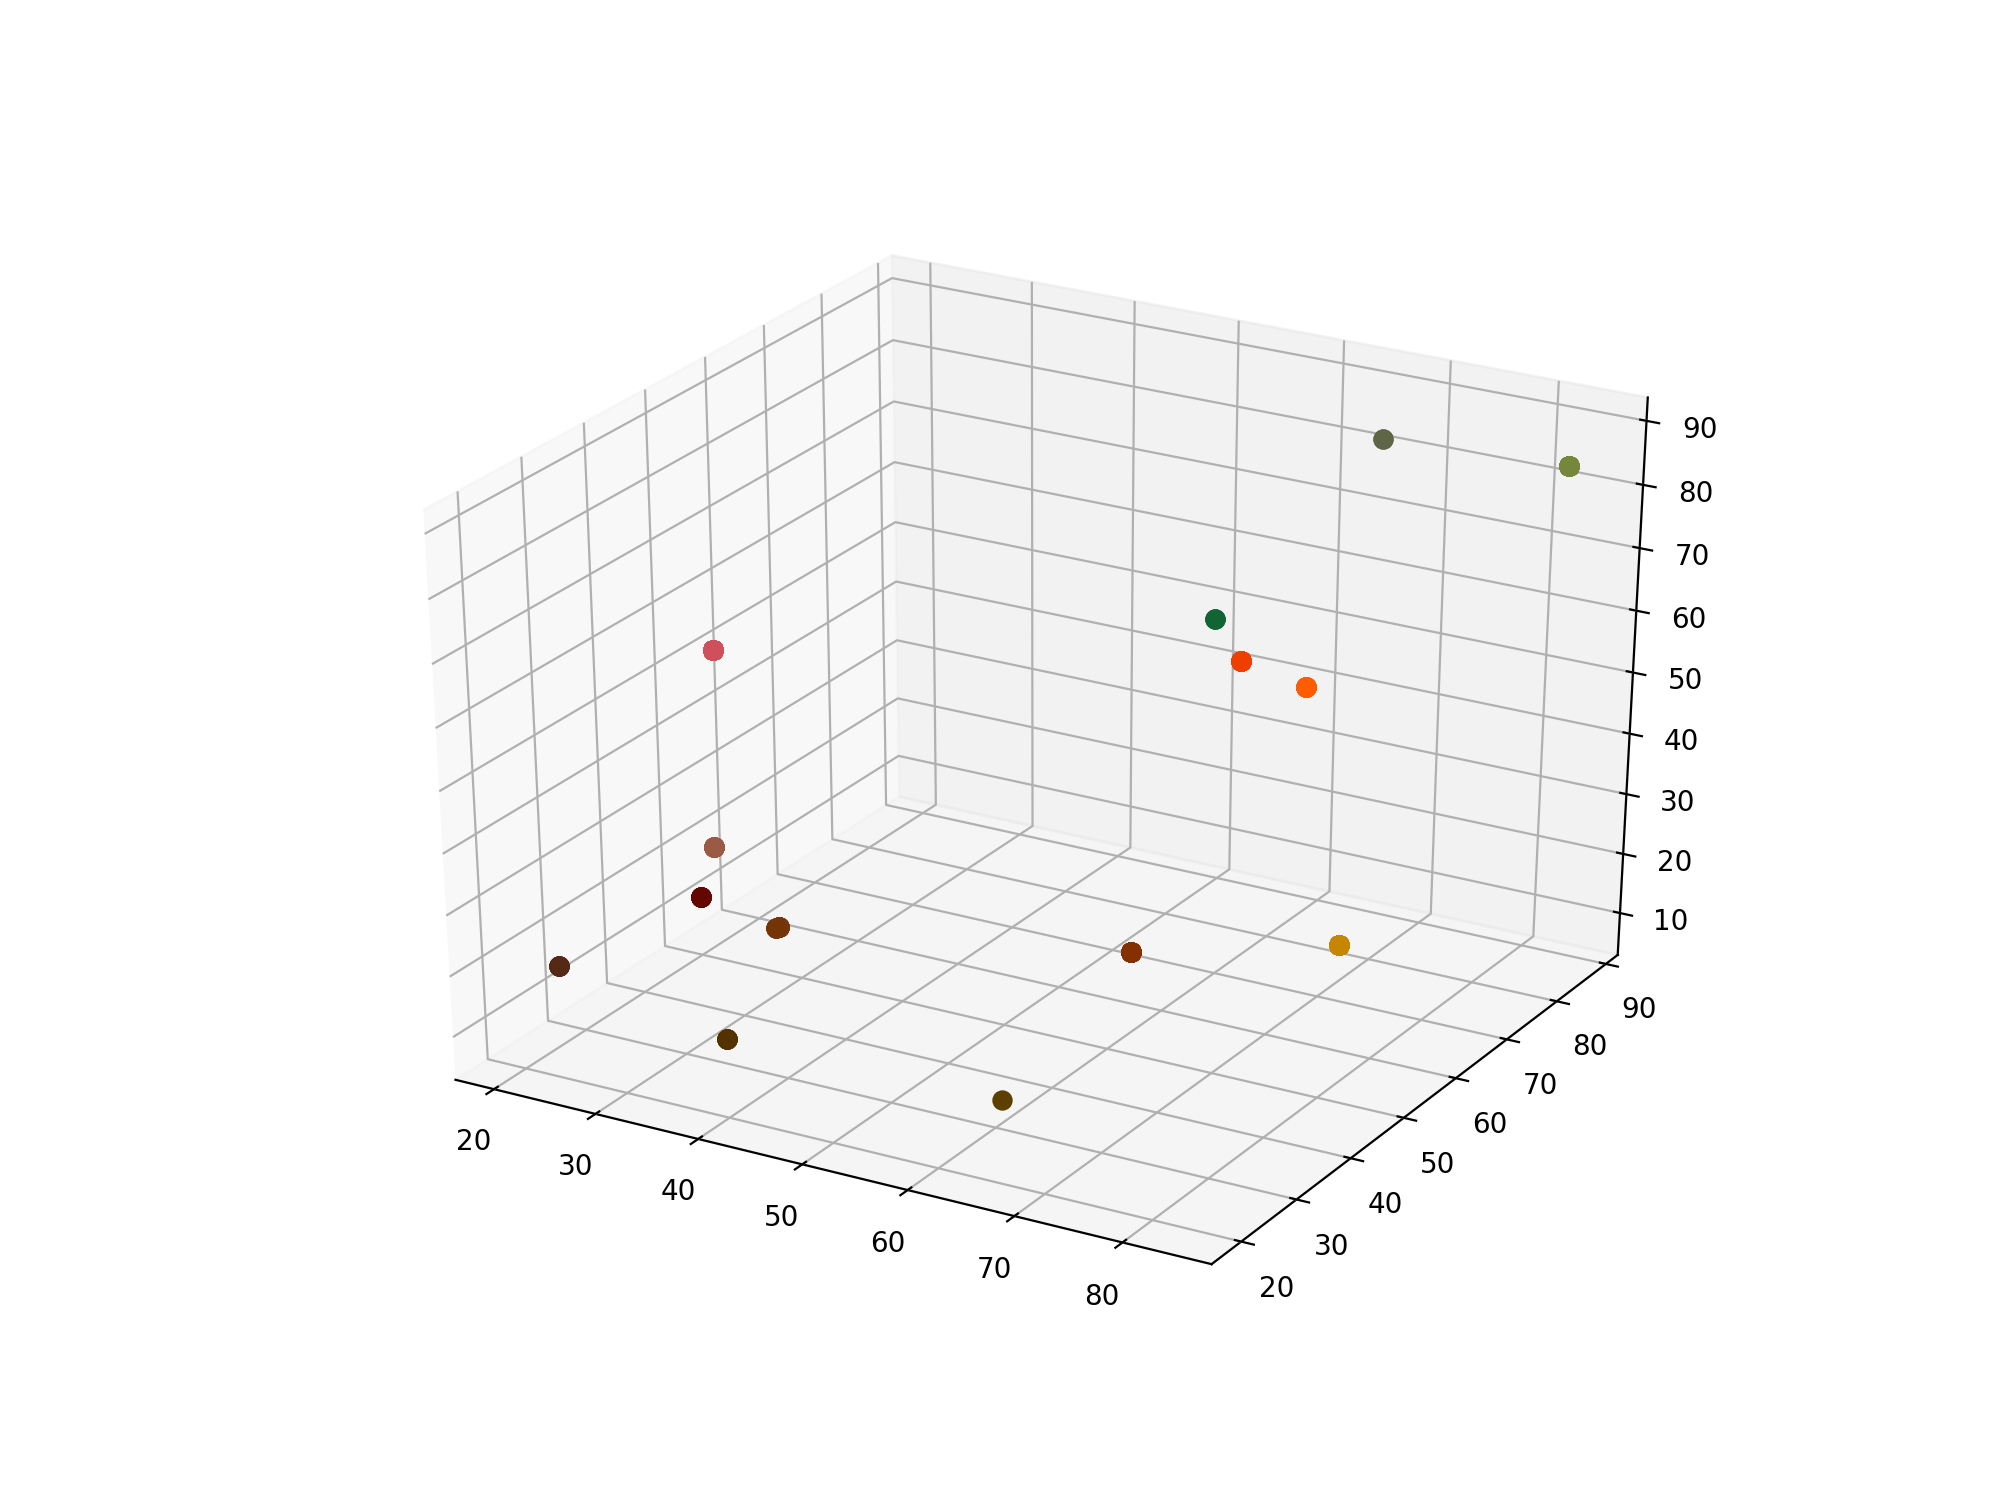

In [251]:
hexcolor = np.array([])
tx = [i[1]*100 for i in colors]
ty = [i[2]*100 for i in colors]
tz = [i[0]*100 for i in colors]
for i in np.arange(len(colors)):
    lab = LabColor(tx[i], ty[i], tz[i])
    rgb = convert_color(lab, sRGBColor)
    hexcolor = np.append(hexcolor, rgb.get_rgb_hex())
for i in range(len(hexcolor)):
    if len(hexcolor[i]) > 7:
        hexcolor[i] = '#'+str(hexcolor[i][2:])
fig = plt.figure(figsize =(10, 7.5))
ax = fig.add_subplot(111, projection='3d')
for i in np.arange(330):
    ax.scatter(tz[i], tx[i], ty[i], color = matplotlib.colors.to_rgba(hexcolor[i]), s=40)
plt.show()